This is the Python code of Example 3.11 in the book:

FIBER-REINFORCED COMPOSITES
Materials, Manufacturing, and Design

by: P.K. Mallick (2008) by Taylor & Francis Group, LLC

This code:
(C) Joris Remmers (2013-2019)


## Example 3.11

Determine the apparent elastic properties $E_{xx}$, $E_{yy}$, $\nu_{xy}$ and $G_{xy}$ as a function of $\theta$ for a symmetric angle ply laminate [$\theta / - \theta /]_s $ , with the same properties as calculated in Example 3.6. 

## Solution

Import the correct functions from the composite module:

In [1]:
from composite import TransverseIsotropic,mixMaterials,Laminate
from numpy     import array,dot

from pylab import plot, show, xlabel, ylabel, legend

As demonstrated in Example 3.6, the ply properties can be obtained as: 

In [2]:
carbon = TransverseIsotropic( 220e9,0.2,91.7e9)
epoxy  = TransverseIsotropic( 3.6e9,0.35,1.33e9)

compmat = mixMaterials( carbon , epoxy , 0.6 )

print("Material properties of the composite material:\n\n",compmat,"\n")

Material properties of the composite material:

   Elastic Properties:
  -----------------------------------------------------------
  E1     :     1.334e+11 , E2     :     8.784e+09 
  nu12   :          0.26 , G12    :     3.254e+09 

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     0.000e+00 , alpha2 :     0.000e+00 
 



The angle ply layup can be created in a similar way as presented in Example 3.7, but since we're interested in using a large range of ply angles $\theta$ a for loop is used to do so. 

Firstly, we initialize an arrays that will be filled inside this loop:

In [3]:
total = []

Then we create the four layer symmetrical angle ply layup for $\theta$ ranging from $0^{\circ}$ to $90^{\circ}$. We calculate the apparent Elastic properties using the function getElastic and store the results. 

In [4]:
lam = Laminate()

lam.addMaterial( 'composite' , compmat )

for theta in range(91):
  lam.removeAllLayers()

  lam.addLayer( 'composite' , theta , 6e-3 )
  lam.addLayer( 'composite' , -theta , 6e-3 )
  lam.addLayer( 'composite' , -theta , 6e-3 )
  lam.addLayer( 'composite' , theta , 6e-3 )

  output = lam.getElastic()

  output.append(theta)

  total.append(output)

Lastly we plot the apparent elastic properties $E_{xx}$, $E_{yy}$, $\nu_{xy}$ and $G_{xy}$ as a function of $\theta$ in a single graph.

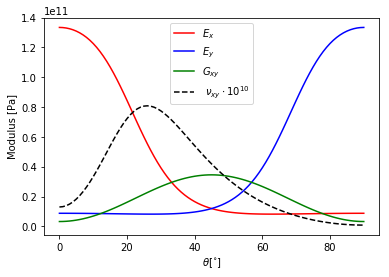

In [5]:
plot( [x[4] for x in total], [x[0] for x in total], 'r-' ,label='$E_x$')
plot( [x[4] for x in total], [x[1] for x in total], 'b-', label='$E_y$' )
plot( [x[4] for x in total], [x[3] for x in total], 'g-' ,label='$G_{xy}$')
plot( [x[4] for x in total], [x[2]*5e10 for x in total], 'k--' ,label=' $\\nu_{xy} \cdot 10^{10}$')
legend()
xlabel('$\\theta [{}^{\circ}]$') 
ylabel('Modulus [Pa]') 

show()

This procedure can be repeated for the [+45/-45]S symmetric, and 
 [+45/0/-45] unsymmetric laminate: